In [45]:
import probabilisticgraph as pg
import yaml
import matplotlib.pyplot as plt
graph_path = 'logisticmap'
l2range = range(1,4)
drange = range(4,13)
mk4range = range(4,13)
alpha = 0.95
algos = []
labels = []
states = []
h = []
k = []
fi = []
tag = 'mk4_v2'
K = 6
H = 9

In [46]:
#Baseline for entropy
with open('results/' + graph_path + '/cond_entropies/original.yaml', 'r') as f:
    h_base = yaml.load(f)[H]

In [ ]:
#Mk1 and Mk2
terms = [
         'dmark',
         'omega_inverted'
        ]
lrange = range(4,13,2)
algos.extend([
        'mk1',
        'mk2'
    ])
labels.extend([
        'Mk1, dmark',
        'Mk1, $\Omega$',
        'Mk2, dmark',
        'Mk2, $\Omega$'
    ])
lrange = range(4,13,2)
for a in algos:
    for t in terms:
        aux = []
        h_aux = []
        for l in lrange:
            ending = '/L' + str(l) + '_alpha' + str(alpha) + '_' + t + '_' + a + '.yaml'
            p = 'graphs/' + graph_path + ending
            g = pg.ProbabilisticGraph(path = p)
            aux.append(len(g.states))
            with open('results/' + graph_path + '/cond_entropies/' + ending, 'r') as f:
                h_aux.append(yaml.load(f)[-1])

        states.append(aux)
        h.append(h_aux)

        with open('results/' + graph_path + '/kld/' + t + '_' + a + '.yaml', 'r') as f:
            k.append(yaml.load(f))

        with open('results/' + graph_path + '/l1metric/' + t + '_' + a + '.yaml', 'r') as f:
            fi.append(yaml.load(f))

In [14]:
#CRISSiS
aux = []
h_aux = []
labels.extend([
        'CRISSiS'
    ])
l2range = range(1,4)
for l in l2range:
    ending = '/L_2_' + str(l) + '_alpha' + str(alpha) + '_crissis.yaml'
    p = 'graphs/' + graph_path + ending
    g = pg.ProbabilisticGraph(path=p)
    aux.append(len(g.states))
    with open('results/' + graph_path + '/cond_entropies'+ ending, 'r') as f:
        h_aux.append(yaml.load(f)[-1])

with open('results/' + graph_path + '/kld/crissis.yaml', 'r') as f:
    k.append(yaml.load(f))

with open('results/' + graph_path + '/l1metric/crissis.yaml', 'r') as f:
    fi.append(yaml.load(f))
    
h.append(h_aux)
states.append(aux)
    

In [47]:
#D-Markov
aux = []
h_aux = []
labels.extend([
        'D-Markov'
    ])
drange = range(4,13)
for d in drange:
    p = 'graphs/' + graph_path + '/dmarkov_d' + str(d) + '.yaml'
    g = pg.ProbabilisticGraph(path=p)
    aux.append(len(g.states))
    with open('results/' + graph_path + '/cond_entropies/dmarkov_d' + str(d) + '.yaml', 'r') as f:
        h_aux.append(yaml.load(f)[-2])

h.append(h_aux)
states.append(aux)

with open('results/' + graph_path + '/kld/dmarkov.yaml', 'r') as f:
    k.append(yaml.load(f))

with open('results/' + graph_path + '/l1metric/dmarkov.yaml', 'r') as f:
    fi.append(yaml.load(f))


In [40]:
#Mk4
aux = []
h_aux = []
labels.extend([
        'Mk4_v1'
    ])
drange = range(4,13,2)
for d in drange:
    p = 'graphs/' + graph_path + '/d' + str(d) + '_alpha0.95_mk4.yaml'
    g = pg.ProbabilisticGraph(path=p)
    aux.append(len(g.states))
    with open('results/' + graph_path + '/cond_entropies/d' + str(d) + '_alpha0.95_mk4.yaml', 'r') as f:
        h_aux.append(yaml.load(f)[-2])

h.append(h_aux)
states.append(aux)

with open('results/' + graph_path + '/kld/mk4.yaml', 'r') as f:
    k.append(yaml.load(f))

with open('results/' + graph_path + '/l1metric/mk4.yaml', 'r') as f:
    fi.append(yaml.load(f))

In [41]:
#Mk4_v2
aux = []
h_aux = []
labels.extend([
        'Mk4_v2'
    ])
drange = range(4,13)
for d in drange:
    p = 'graphs/' + graph_path + '/d' + str(d) + '_alpha0.95_v2_mk4.yaml'
    g = pg.ProbabilisticGraph(path=p)
    aux.append(len(g.states))
    with open('results/' + graph_path + '/cond_entropies/d' + str(d) + '_alpha0.95_v2_mk4.yaml', 'r') as f:
        h_aux.append(yaml.load(f)[-2])

h.append(h_aux)
states.append(aux)

with open('results/' + graph_path + '/kld/mk4_v2.yaml', 'r') as f:
    k.append(yaml.load(f))

with open('results/' + graph_path + '/l1metric/mk4_v2.yaml', 'r') as f:
    fi.append(yaml.load(f))

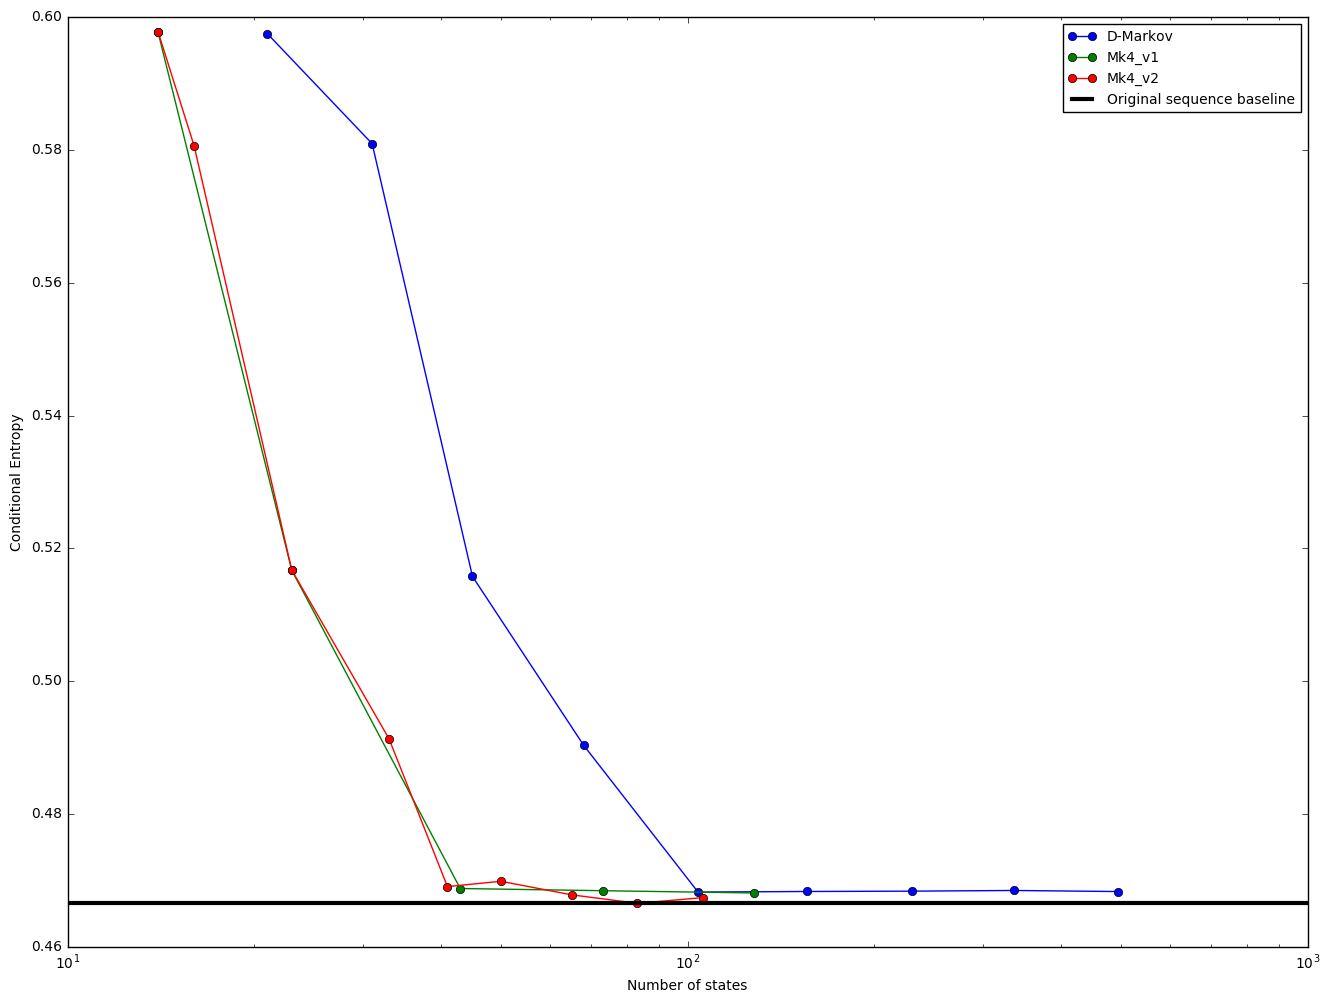

In [42]:
#Plot entropies:
plt.clf()
ax = plt.figure(figsize=(16,12))
i = 0
for s in states:
    plt.semilogx(s, h[i], marker = 'o', label = labels[i])
    i += 1

plt.axhline(y=h_base, color='k', linewidth = 3, label='Original sequence baseline')
plt.legend(loc='upper right', shadow=False, fontsize='medium')
plt.xlabel('Number of states')
plt.ylabel('Conditional Entropy')
save_path = 'plots/' + graph_path + '/cond_entropies_' + tag + '.png'
plt.savefig(save_path, bbox_inches='tight')
plt.show()

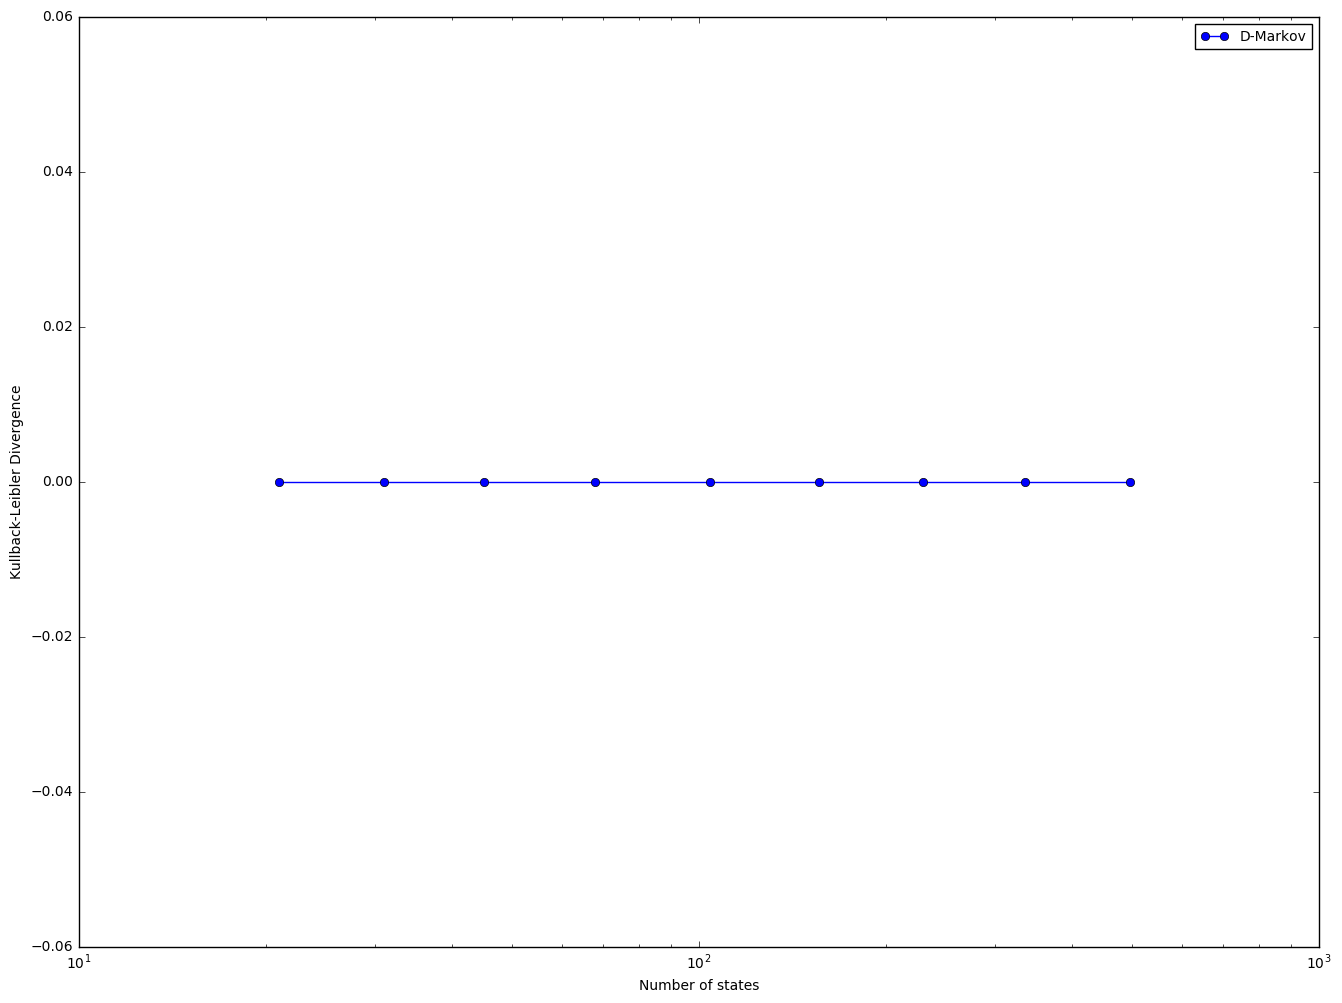

In [48]:
#Plot KLD
t = 'kld'
plt.clf()
ax = plt.figure(figsize=(16,12))
i = 0
x = k if t == 'kld' else fi
for s in states:
    plt.semilogx(s, x[i], marker='o', label=labels[i])
    i += 1
plt.legend(loc='upper right', shadow=False, fontsize='medium')
plt.xlabel('Number of states')
ylbl = 'Kullback-Leibler Divergence' if t == 'kld' else '$\Phi$'
plt.ylabel(ylbl)
save_path = 'plots/' + graph_path + '/' + t + '_' + tag + '.png'
plt.savefig(save_path, bbox_inches='tight')
plt.show()

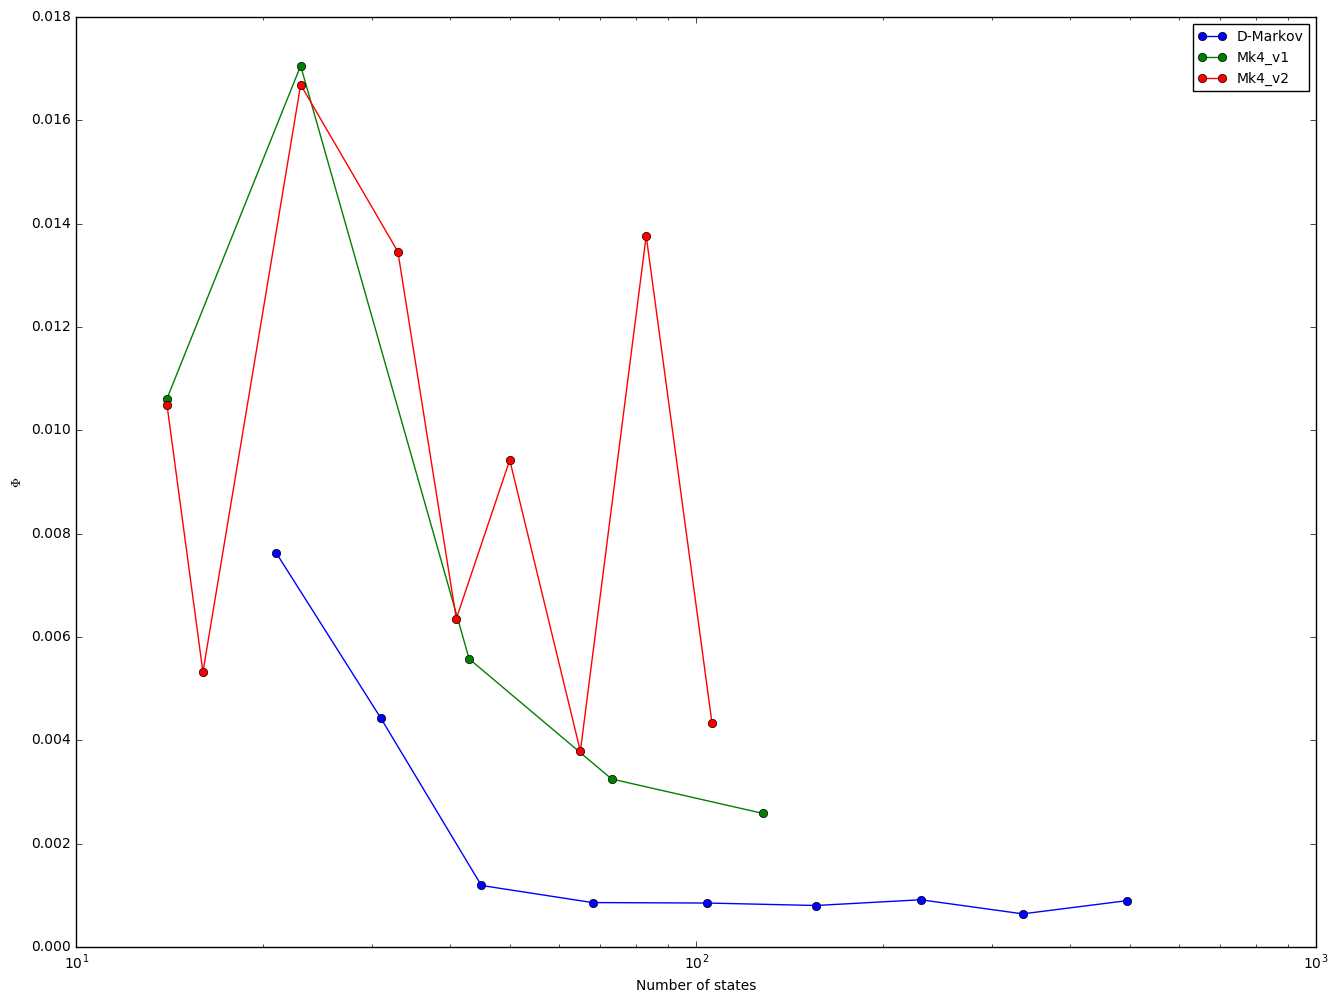

In [44]:
#Plot Phi
t = 'phi'
plt.clf()
ax = plt.figure(figsize=(16,12))
i = 0
x = k if t == 'kld' else fi
for s in states:
    plt.semilogx(s, x[i], marker='o', label=labels[i])
    i += 1
plt.legend(loc='upper right', shadow=False, fontsize='medium')
plt.xlabel('Number of states')
ylbl = 'Kullback-Leibler Divergence' if t == 'kld' else '$\Phi$'
plt.ylabel(ylbl)
save_path = 'plots/' + graph_path + '/' + t + '_' + tag + '.png'
plt.savefig(save_path, bbox_inches='tight')
plt.show()